<a href="https://colab.research.google.com/github/RanojoyBiswas/Play-Store-App-Review-Analysis-/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## Exploratory Data Analysis (EDA) refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

### It is a good practice to understand the data first and try to gather as many insights from it as possible. EDA is all about making sense of data in hand, before getting dirty with it.

(Source: www.towardsdatascience.com)



### We have two datasets to perform EDA on them. First, we shall have a close look on both of the datasets, so that we know what kind of insights we might expect from that particular data and what exact steps that we need to perform to get there..

### We will also try to build a sentiment analysis model on the second dataset and try to help making discoveries regarding the future observations..

### **First things first** : Calling in the libraries...
---



In [1]:
# importing the helps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing our drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Getting to know our first data set ---> Play Store Dataset**



In [3]:
# reading the playstore apps data set
df = pd.read_csv('/content/drive/MyDrive/EDA Projects/Ranajay Biswas - EDA on Play Store App Review Data/Datasets/Play Store Data.csv')

In [4]:
# making a copy of the main dataframe for furthur use
playstore_df = df.copy()

In [5]:
# checking the first 5 rows to see what we are dealing with
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
# checking the columns
playstore_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

### **Having a brief look at the first dataset we think we can draw insights like** -

*   Size distribution of apps in the data
*   How Review, Ratings etc varied for each app category
*   Prices charged by different apps
*   Number of installations for different app categories
*   Content ratings distribution for each category 
*   Factors that might have influenced app installations etc..







---


In [7]:
# checking the shape
playstore_df.shape

(10841, 13)

In [8]:
# getting an idea about the data types present
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
# checking unique values
playstore_df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [10]:
# checking for initial numerical variables
playstore_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


So, right now we only have one column with numerical value which is the 'Rating' column

In [11]:
# understanding which columns has what number of null values
playstore_df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## The Cleansing and the filling process begins --->

---


### Starting with the ---> 'Rating' column

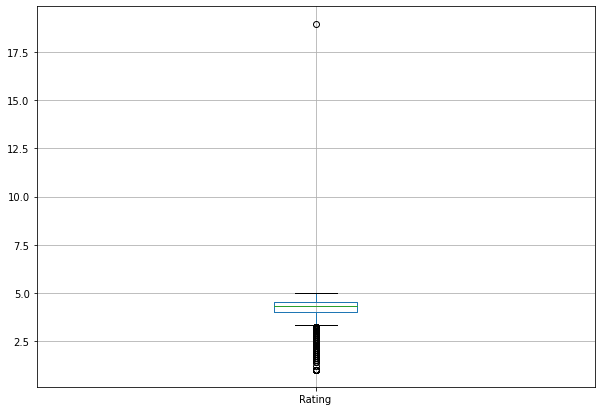

In [12]:
playstore_df.boxplot(figsize = (10,7))

# plt.show

It seems like we have one outlier

---



### Let's get rid of the outlier and other extraneous values if present.
As, there should not be any value above 5.0 and less than 1.0, so, we will first check how many rows we have with rating more than 5.0 and less than 1.0

In [13]:
playstore_df[(playstore_df['Rating']> 5.0) | (playstore_df['Rating']< 1.0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


So, we only have one such row. Let's just drop the row to keep the authenticity of the data set

In [14]:
# dataframe with all the rows except that one row with the outlier
playstore_df.drop(playstore_df[(playstore_df['Rating']> 5.0) | (playstore_df['Rating']< 1.0)].index, inplace= True)


In [15]:
# checking the changes
playstore_df[10469:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication,"August 2, 2018",4.2.1,4.2 and up
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


As we see, row no. 10472 has been dropped.

We had one outlier, let's check the skewness now

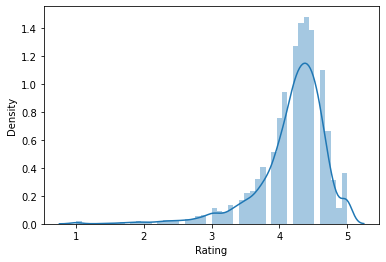

In [16]:
# playstore_df.plot(kind = 'density')
sns.distplot(playstore_df.Rating)

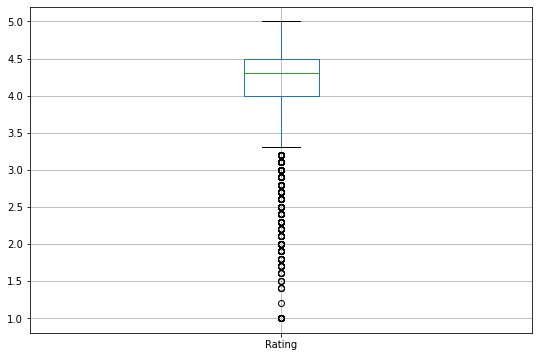

In [17]:
playstore_df.boxplot(figsize = (9,6))

In [18]:
playstore_df.shape

(10840, 13)

###  As our data is skewed and it seems to be most of the values lie within 4.0 to 4.5
So, we are going to use the median to fill the null values in the 'Rating' column

In [19]:
# fill all the rows where the rating col value is null
playstore_df['Rating'].fillna(float(playstore_df['Rating'].median()), inplace=True)


In [20]:
# let's see the null values again
playstore_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

### All the null values for the "Rating" column is gone now.. Moving on to other columns--

### Next we have 'Type', 'Current version' and 'Android version columns to work on
These columns have categorical data. So, we are going to choose mode for replacing the na values values in those columns

In [21]:
# first checking the modes ----->
Curr_ver_mode  = playstore_df['Current Ver'].mode()
print(Curr_ver_mode)
Android_ver_mode  = playstore_df['Android Ver'].mode()
print(Android_ver_mode)
app_type = playstore_df['Type'].mode()
print(app_type)

0    Varies with device
dtype: object
0    4.1 and up
dtype: object
0    Free
dtype: object


In [22]:
# replacing null values with the modes --->
playstore_df['Current Ver'].fillna(str(playstore_df['Current Ver'].mode()), inplace=True)

playstore_df['Android Ver'].fillna(str(playstore_df['Android Ver'].mode()), inplace=True)

playstore_df['Type'].fillna(str(playstore_df['Type'].mode()), inplace=True)

In [23]:
# making sure we got rid of all the null values
playstore_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [24]:
playstore_df.shape

(10840, 13)

## So, we have removed all the null values from our data set...

## But the challenge that stands before us now is that some of the columns technically should contain numerical values and need to be numerical, so that we get the preferred results out of them...

In [25]:
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## It initially looks like 'Reviews', 'Installs' and 'Price' columns are categorical. Whereas, we need them to be numerical to do visualizations. It would also help to have 'Size' column as numeric. So, let's check what's the situation here --->

### For the 'Price' column :

In [26]:
# checking the unique values in the price column
playstore_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

### The problem is that we are having a dollar sign infront of the values in our 'Price' column.
Let's get rid of the dollar sign , and transform the str values into float type ---->

In [27]:
# applying lambda function to replace '$' with nothing, and then convert str to numerical
playstore_df['Price'] = playstore_df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))

playstore_df['Price'] = playstore_df['Price'].apply(lambda x: float(x))


### Dealing with the 'Reviews' column next.

In [28]:
playstore_df['Reviews'] = pd.to_numeric(playstore_df['Reviews'],errors='coerce')

### 'Installs' column seems to have delimiter ' , ' and ' + ' sign assosiated with the values.
So, we need to remove them and then make them numeric

In [29]:
# getting rid of '+' and ',' in Installs column and converting them to numeric values
playstore_df['Installs'] = playstore_df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))

playstore_df['Installs'] = playstore_df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))

playstore_df['Installs'] = pd.to_numeric(playstore_df['Installs'],errors='coerce')

### For 'Size' column :

In [30]:
# checking the unique values
playstore_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

 Most of the sizes are in Megabytes (M) and Kilobytes (k).. We are going to change the Kilobytes values to approx Megabytes values by simply dividing them by 1000

In [31]:
# converting Size column to numeric data type
playstore_df['Size'] = playstore_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
playstore_df['Size'] = playstore_df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
playstore_df['Size'] = playstore_df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
playstore_df['Size'] = playstore_df['Size'].apply(lambda x: float(x))

In [32]:
playstore_df.shape

(10840, 13)

### Let's check if our columns turned numeric or not

In [33]:
# checking the numeric columns stats
playstore_df.describe()

,Rating,Reviews,Size,Installs,Price
count,10840.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,21.516530,1.546434e+07,1.027368
std,0.480342,2.927761e+06,22.588748,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,4.900000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,30.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [34]:
# checking the dataframe now
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Our dataset looks all set to do visualizations now. 
## So, let's get started with some visualisatons ----->
### To have a perfect sense of what insights our data can give in a broader sense, for the most part, we will be grouping our dataframe by 'Category' and then we will be seeing the correalation of category with rating, reviews and price etc..

In [35]:
# grouping by category ---->
category_df = playstore_df.groupby('Category')

## **Visualization** :

---



In [36]:
rev_rating_cat = category_df[['Rating', 'Reviews']].agg(np.mean).reset_index().sort_values('Rating', ascending = False)[:10]
rev_rating_cat

,Category,Rating,Reviews
10,EVENTS,4.395313,2.515906e+03
8,EDUCATION,4.388462,2.538191e+05
0,ART_AND_DESIGN,4.355385,2.637600e+04
3,BOOKS_AND_REFERENCE,4.335498,9.506090e+04
23,PERSONALIZATION,4.328827,2.279238e+05
22,PARENTING,4.300000,1.597218e+04
14,GAME,4.286888,1.385859e+06
2,BEAUTY,4.283019,7.476226e+03
15,HEALTH_AND_FITNESS,4.280059,1.111253e+05
26,SHOPPING,4.263077,4.424662e+05


### How Rating varied based on Category :

In [37]:
# average rating category wise ----> 
rating_category = category_df['Rating'].agg(np.mean)
print(rating_category)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

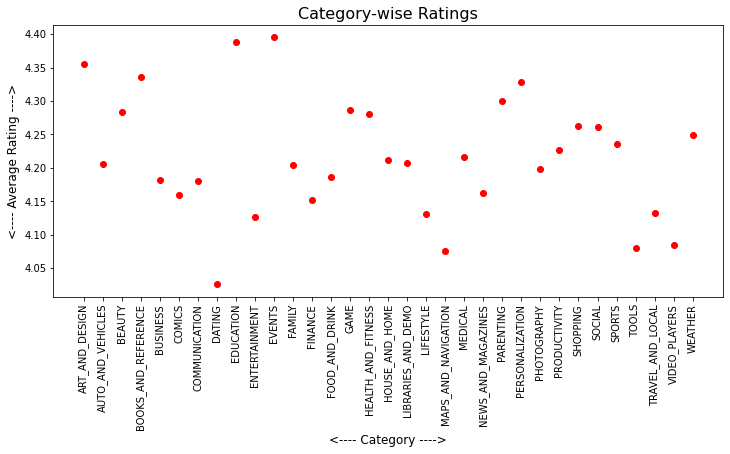

In [38]:
# plotting Categorywise Rating graph ----->
plt.figure(figsize=(12, 5))
plt.plot(rating_category, 'ro')
plt.xticks(rotation = 90)
plt.title('Category-wise Ratings', fontsize=16)
plt.xlabel('<---- Category ---->', fontsize=12)
plt.ylabel('<---- Average Rating ---->', fontsize=12)
plt.show()

### *From the above plot, we can say that apps with the highest average rating in the dataset falls into the category of -*

1. EVENTS
2. EDUCATION
3. ART_AND_DESIGN  

### *The lowest rated apps have been --->*  DATING apps


---




### Distribution of size :

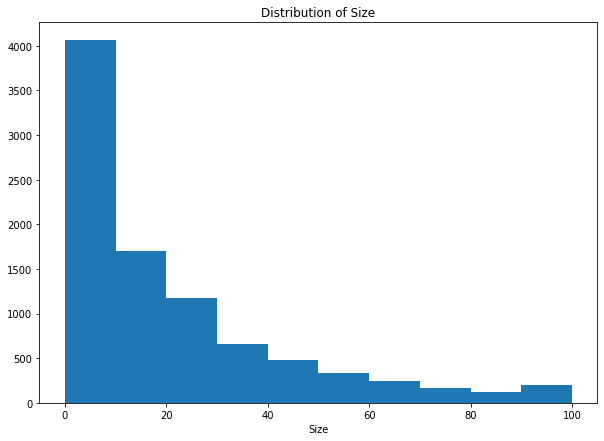

In [39]:
plt.figure(figsize=(10, 7))
plt.xlabel("Size")
plt.title("Distribution of Size")
plt.hist(playstore_df['Size']);
plt.show()

### From the histogram, we can say that most of the apps in our dataset have relatively smaller size somewhere between 0-30  

---

### Reviews in each category :

In [40]:
# average no. of reviews category wise ----> 
review_category = category_df['Reviews'].agg(np.mean)
print(review_category)

Category
ART_AND_DESIGN         2.637600e+04
AUTO_AND_VEHICLES      1.369019e+04
BEAUTY                 7.476226e+03
BOOKS_AND_REFERENCE    9.506090e+04
BUSINESS               3.033598e+04
COMICS                 5.638793e+04
COMMUNICATION          2.107138e+06
DATING                 3.115931e+04
EDUCATION              2.538191e+05
ENTERTAINMENT          3.971688e+05
EVENTS                 2.515906e+03
FAMILY                 2.080255e+05
FINANCE                4.795281e+04
FOOD_AND_DRINK         6.994748e+04
GAME                   1.385859e+06
HEALTH_AND_FITNESS     1.111253e+05
HOUSE_AND_HOME         4.518619e+04
LIBRARIES_AND_DEMO     1.220139e+04
LIFESTYLE              3.372457e+04
MAPS_AND_NAVIGATION    2.237902e+05
MEDICAL                3.425432e+03
NEWS_AND_MAGAZINES     1.922292e+05
PARENTING              1.597218e+04
PERSONALIZATION        2.279238e+05
PHOTOGRAPHY            6.373631e+05
PRODUCTIVITY           2.691438e+05
SHOPPING               4.424662e+05
SOCIAL             

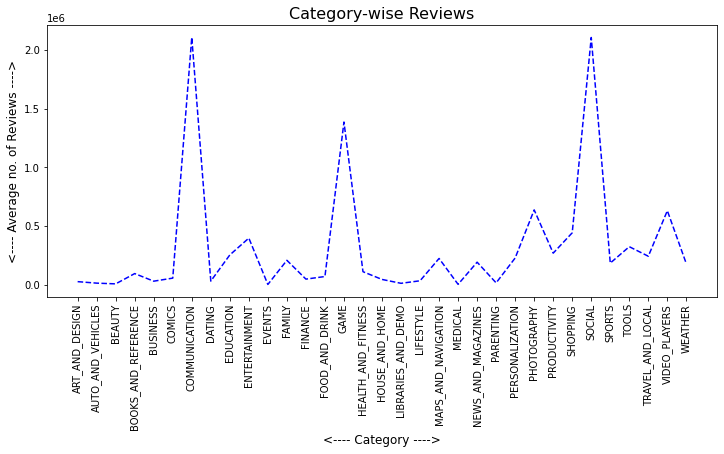

In [41]:
# plotting Categorywise Review graph ----->
plt.figure(figsize=(12, 5))
plt.plot(review_category, 'r--', color= 'b')
plt.xticks(rotation = 90)
plt.title('Category-wise Reviews', fontsize=16)
plt.xlabel('<---- Category ---->', fontsize=12)
plt.ylabel('<---- Average no. of Reviews ---->', fontsize=12)
plt.show()

### Communication and Social apps have received the highest no. of reviews, even though they have somewhat of an average ratings among all the categories.

### Gaming is another highly reviewed app category
---

### Category Wise Installations :

In [42]:
# average Installs category wise ----> 
Install_category = category_df['Installs'].agg(np.mean)
print(Install_category)

Category
ART_AND_DESIGN         1.912894e+06
AUTO_AND_VEHICLES      6.250613e+05
BEAUTY                 5.131519e+05
BOOKS_AND_REFERENCE    8.318050e+06
BUSINESS               2.178076e+06
COMICS                 9.347692e+05
COMMUNICATION          8.435989e+07
DATING                 1.129533e+06
EDUCATION              5.586231e+06
ENTERTAINMENT          1.925611e+07
EVENTS                 2.495806e+05
FAMILY                 5.201959e+06
FINANCE                2.395215e+06
FOOD_AND_DRINK         2.156683e+06
GAME                   3.066960e+07
HEALTH_AND_FITNESS     4.642441e+06
HOUSE_AND_HOME         1.917187e+06
LIBRARIES_AND_DEMO     7.411284e+05
LIFESTYLE              1.407444e+06
MAPS_AND_NAVIGATION    5.286729e+06
MEDICAL                1.150269e+05
NEWS_AND_MAGAZINES     2.648876e+07
PARENTING              5.253518e+05
PERSONALIZATION        5.932385e+06
PHOTOGRAPHY            3.011417e+07
PRODUCTIVITY           3.343418e+07
SHOPPING               1.249173e+07
SOCIAL             

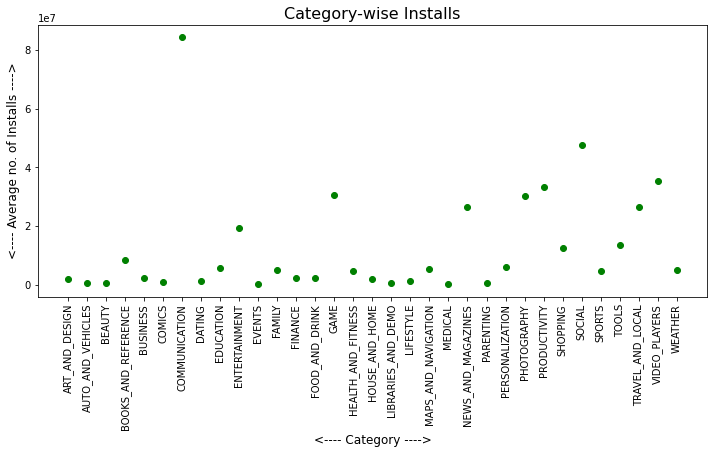

In [43]:
# plotting Categorywise Installs graph ----->
plt.figure(figsize=(12, 5))
plt.plot(Install_category, 'go') #color= 'b')
plt.xticks(rotation = 90)
plt.title('Category-wise Installs', fontsize=16)
plt.xlabel('<---- Category ---->', fontsize=12)
plt.ylabel('<---- Average no. of Installs ---->', fontsize=12)
plt.show()

### So, Communication apps have the highest number of Installs. A lot more than any other category. Followed by, Social apps. 
### These two apps categories also have the highest number of reviews. 

---

### Apps in each Category :

In [44]:
# Number of apps category wise ----> 
Install_category_series = category_df['App'].count()

In [45]:
Install_category2 = Install_category_series.to_frame()

In [46]:
Install_category2.reset_index(inplace=True)

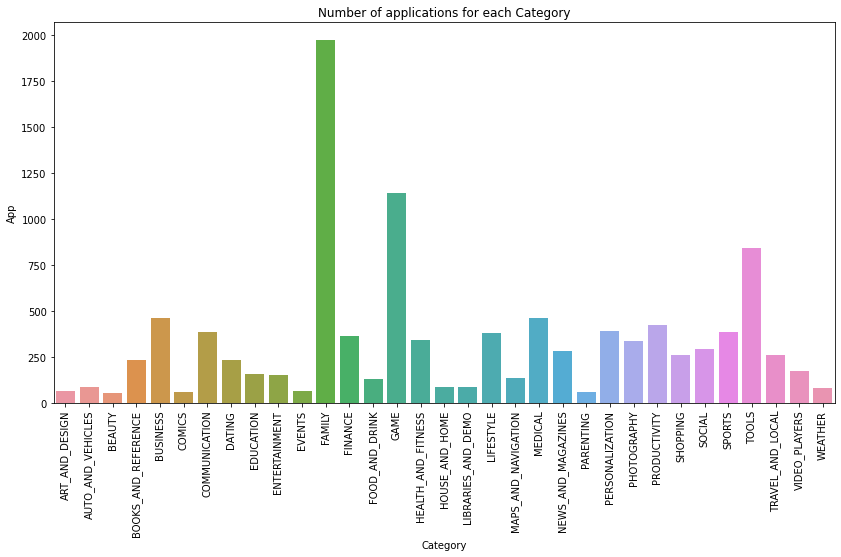

In [47]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("App")
plt.title("Number of applications for each Category")
sns.barplot(Install_category2.Category, Install_category2.App)
plt.show()

### Our dataset consists of most number of applications from the following categories -   

*   Family
*   Game
*   Tools

### Category-wise Prices :

In [48]:
# Category wise Prices ----> 
price_category_series = category_df['Price'].agg(np.sum)

In [49]:
price_category_df = price_category_series.to_frame().reset_index()

In [50]:
price_category_df.columns = ['Category', 'Price']

In [51]:
price_category_df

,Category,Price
0,ART_AND_DESIGN,5.97
1,AUTO_AND_VEHICLES,13.47
2,BEAUTY,0.00
3,BOOKS_AND_REFERENCE,119.77
4,BUSINESS,185.27
5,COMICS,0.00
6,COMMUNICATION,83.14
7,DATING,31.43
8,EDUCATION,17.96
9,ENTERTAINMENT,7.98


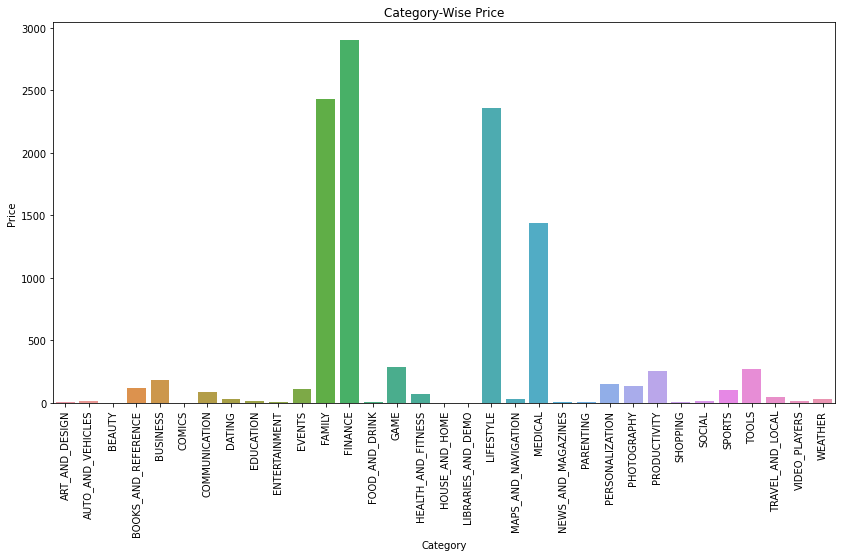

In [52]:
# Plotting category wise Prices graph
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Price")
plt.title("Category-Wise Price")
sns.barplot(price_category_df.Category, price_category_df.Price)
plt.show()

### Finance, Family, Lifestyle and Medical apps have charged the most amount of money among all the the categories. 
### These apps have low number of reviews with ratings somewhere between 4.1 to 4.25 

---



### Now let's check exactly how number of installations were influenced by the app 'type' which in this case - if the app was available for free or it was paid..

In [53]:
# grouping by category and type, then summing the installs
ctg_type_installs = playstore_df.groupby(['Category','Type'])[['Installs']].sum().reset_index()

In [54]:
ctg_type_installs.head()

,Category,Type,Installs
0,ART_AND_DESIGN,Free,124322100
1,ART_AND_DESIGN,Paid,16000
2,AUTO_AND_VEHICLES,Free,53080061
3,AUTO_AND_VEHICLES,Paid,50150
4,BEAUTY,Free,27197050


In [55]:
ctg_type_installs['Type'] = ctg_type_installs['Type'].apply(lambda x: str(x).replace('0    Free\ndtype: object', 'Free') if '0    Free\ndtype: object' in str(x) else str(x))


In [56]:
ctg_type_installs['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [57]:
# taking log in order to get better visualizations
ctg_type_installs['log_Installs'] = np.log2(ctg_type_installs['Installs'])
ctg_type_installs.head()

,Category,Type,Installs,log_Installs
0,ART_AND_DESIGN,Free,124322100,26.889508
1,ART_AND_DESIGN,Paid,16000,13.965784
2,AUTO_AND_VEHICLES,Free,53080061,25.661667
3,AUTO_AND_VEHICLES,Paid,50150,15.613962
4,BEAUTY,Free,27197050,24.696947


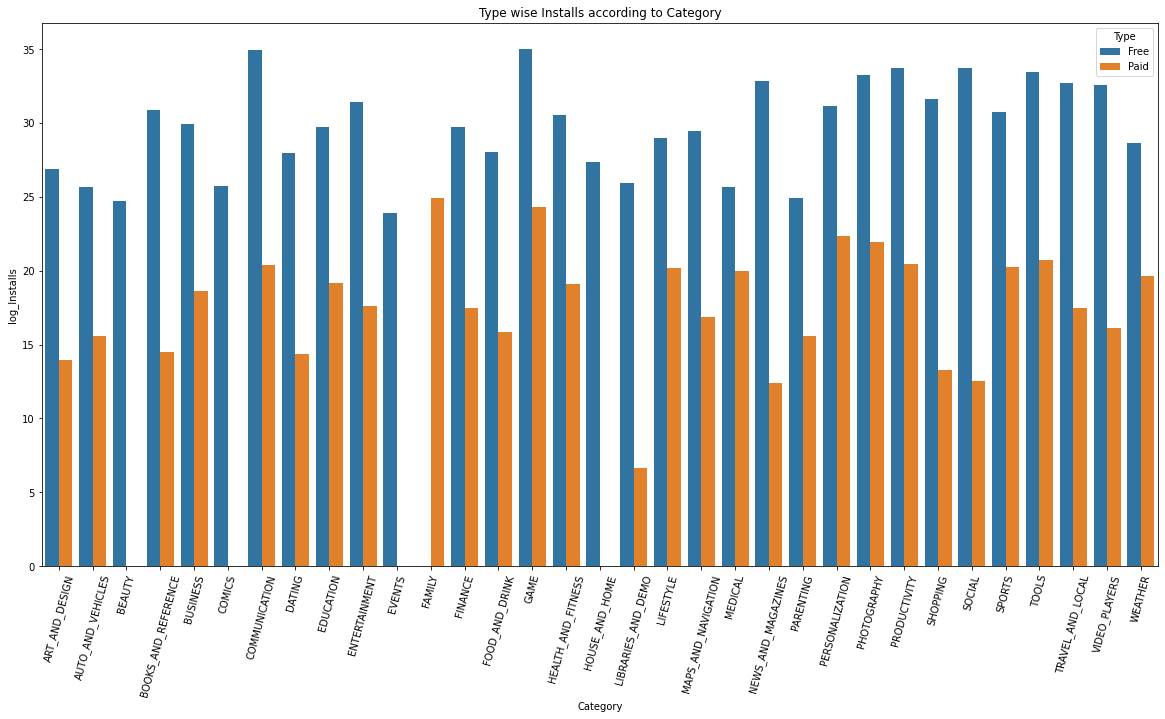

In [58]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=75,fontsize=10)
plt.title("Type wise Installs according to Category")
sns.barplot('Category', 'log_Installs', hue='Type', data=ctg_type_installs);
plt.xlabel("Category")
plt.ylabel("log_Installs")
plt.show()

### We can easily say that, free apps were installed a lot more than paid apps in every app category..

---

### Apps in each Category based on Content Rating

In [59]:
# checking the unique values for Content Rating column
playstore_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

Looks like, we have 6 unique values for 'Content Rating'. And every app in our data falls under one of these 6 values of content rating.

In [60]:
content_ratings_sr = playstore_df.groupby(['Category'])['Content Rating'].value_counts()

In [61]:
content_ratings_df= content_ratings_sr.to_frame()

In [62]:
content_ratings_df = content_ratings_df.rename(columns = {'Category': 'Category', 'Content Rating': 'Content Rating', 'Content Rating': 'Number'}, inplace = False)

In [63]:
content_ratings_df['Number of apps'] = np.log2(content_ratings_df['Number'])

In [64]:
content_ratings_df.reset_index(inplace= True)

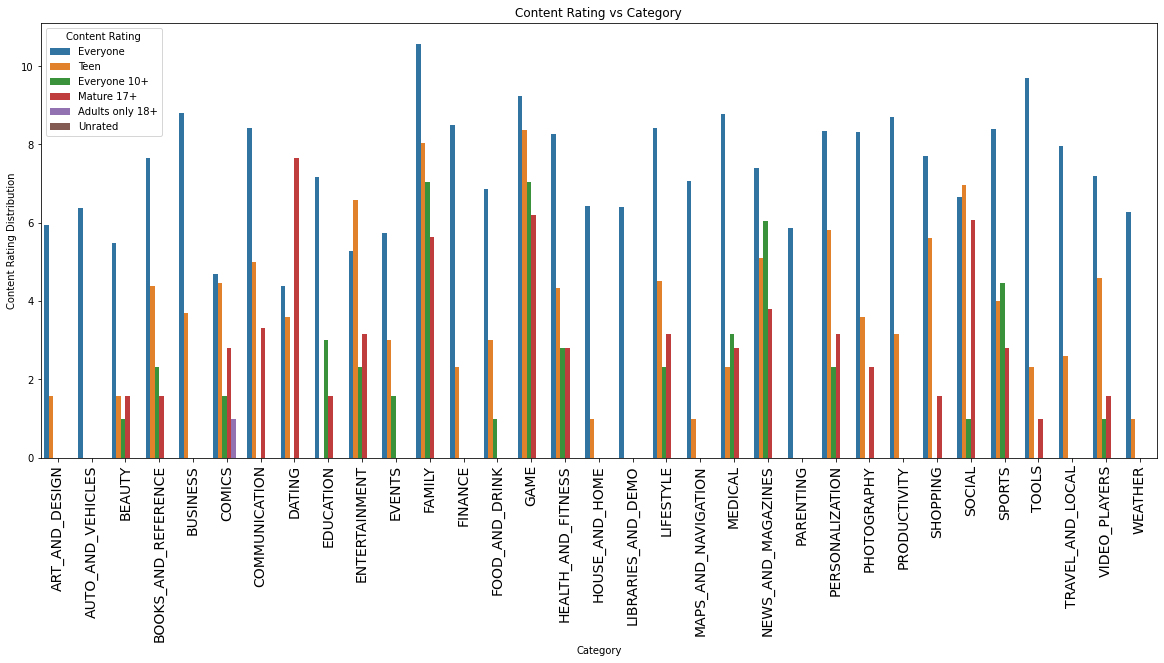

In [65]:
# plotting the chart
plt.figure(figsize=(20,8))
plt.xticks(rotation=90,fontsize=14)
plt.title("Content Rating vs Category")
sns.barplot('Category', 'Number of apps', hue='Content Rating', data=content_ratings_df);
plt.xlabel("Category")
plt.ylabel("Content Rating Distribution")
plt.show()

### **We can say** - 
*   All the app-categories in our data had applications with Content Rating - 'Everyone'..
*   'Teen' is another popular Content Rating type in our data. 
*   'Comics' category is the only category which have noticable amount of applications available for Adults.


---

# ***Getting to know our second data set --- User Reviews data set***

In [66]:
# reading the user reviews data set
reviews_df = pd.read_csv('/content/drive/MyDrive/EDA Projects/Ranajay Biswas - EDA on Play Store App Review Data/Datasets/User Reviews.csv')

In [67]:
# checking the data
reviews_df[198:208]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
198,10 Best Foods for You,Nothing special! Could find anything useful!,Positive,0.410714,0.285714
199,10 Best Foods for You,Its ok I love ok.,Positive,0.500000,0.533333
200,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Great,Positive,0.800000,0.750000
201,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,nice,Positive,0.600000,1.000000
202,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Almost mobile phone,Neutral,0.000000,0.000000
203,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,"Very effective, efficient convenient find avai...",Positive,0.626667,0.666667
204,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Easy intuitive,Positive,0.433333,0.833333
205,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,good searching job internship,Positive,0.700000,0.600000
206,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,"Not bad, price little bit expensive",Negative,-0.112500,0.622222
207,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,easy use!,Positive,0.541667,0.833333


In [68]:
reviews_df.shape

(64295, 5)

In [69]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [70]:
reviews_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [71]:
# understanding which columns has what number of null values
reviews_df.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [72]:
reviews_df.isnull()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,False,False,False,False,False
1,False,False,False,False,False
2,False,True,True,True,True
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
64290,False,True,True,True,True
64291,False,True,True,True,True
64292,False,True,True,True,True
64293,False,True,True,True,True


### It looks like there are many rows which have value present in them only for 'App' column and don't have any other column values. As we don't know about the customer responses, we have to drop all the rows like these.
 

In [73]:
# dropping the null values
reviews_df.dropna(axis= 0, inplace=True)
reviews_df.shape

(37427, 5)

In [74]:
# checking the null values again
reviews_df.isna().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

## **Visualization :**

### *Sentiment Polarity ----*

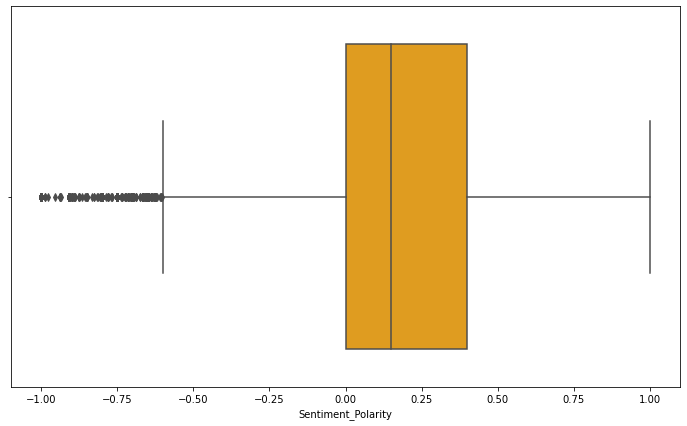

In [75]:
# plotting a boxplot
plt.figure(figsize=(12,7))
sns.boxplot(reviews_df['Sentiment_Polarity'], color  = 'orange')

### *Sentiment Subjectivity ----*

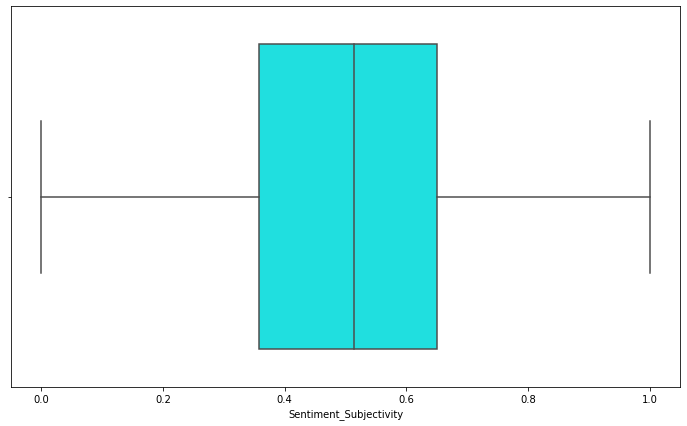

In [76]:
# plotting a boxplot
plt.figure(figsize=(12,7))
sns.boxplot(reviews_df['Sentiment_Subjectivity'], color  = 'cyan')

### Grouping by App name --->

In [77]:
# grouping by Apps ---->
app_df = reviews_df.groupby('App')

In [78]:
app_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64196,Housing-Real Estate & Property,Incorrect listings. The agents show property d...,Negative,-0.025000,0.125000
64197,Housing-Real Estate & Property,Pathetic app.All posted leads owner either old...,Negative,-0.362500,0.625000
64198,Housing-Real Estate & Property,It's waste app... Most properties 2017... And ...,Positive,0.266667,0.375000
64199,Housing-Real Estate & Property,Filters useless I posted owners shows agents a...,Negative,-0.500000,0.200000


### Which apps have been reviewed the most?

In [79]:
app_review_count = app_df['Translated_Review'].count()
print(app_review_count.sort_values(ascending = False))

App
Bowmasters                        312
Helix Jump                        273
Angry Birds Classic               273
Calorie Counter - MyFitnessPal    254
Duolingo: Learn Languages Free    240
                                 ... 
Draw a Stickman: EPIC 2             1
HD Camera                           1
Draw In                             1
Draw A Stickman                     1
Best Fiends - Free Puzzle Game      1
Name: Translated_Review, Length: 865, dtype: int64


In [80]:
# slicing the data for the top 20 apps with most reviews ----->
x = app_review_count.sort_values(ascending = False).iloc[:20]

In [81]:
top_review_app_df = x.to_frame().reset_index()

In [82]:
top_review_app_df.columns = ['App', 'Reviews']

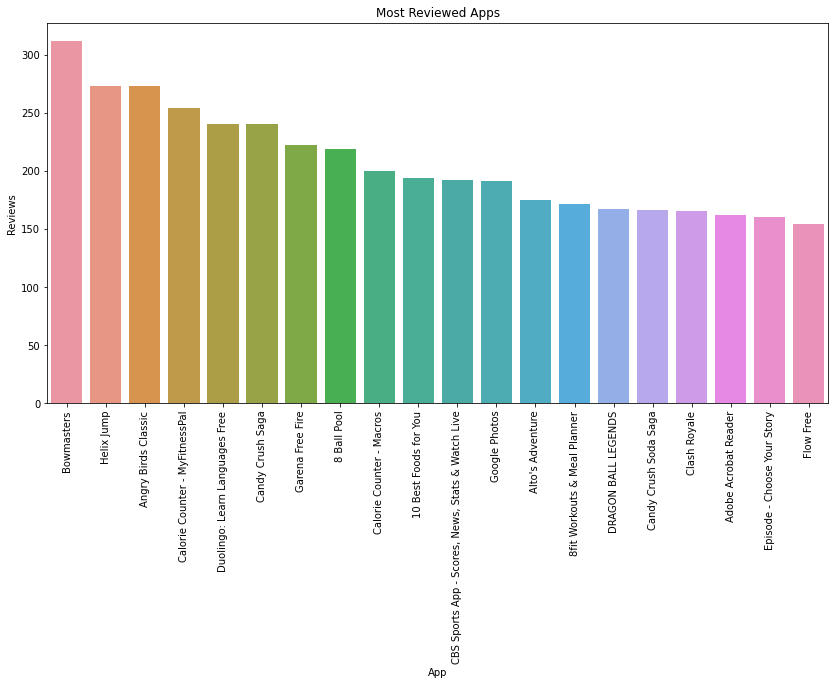

In [83]:
# Plotting the graph
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Apps")
plt.ylabel("Reviews")
plt.title("Most Reviewed Apps")
sns.barplot(top_review_app_df.App, top_review_app_df.Reviews)
plt.show()

### Top 3 apps that have the highest no. of reviews are --


1. Bowmasters
2. Angry Birds Classic
3. Helix Jump


## Which apps that have the most positive reviews?

In [84]:
# taking a dataframe where all the sentiment of users are positive
pos_df= reviews_df[reviews_df['Sentiment'] == 'Positive']

# grouping by app name
p = pos_df.groupby('App')

In [85]:
# sorting by the no. of positive sentiment reviewed apps (highest to lowest) and taking the top 20
most_positive_apps = p['Sentiment'].count().sort_values(ascending= False).iloc[:20]
most_positive_apps

App
Helix Jump                                           209
Duolingo: Learn Languages Free                       200
Calorie Counter - Macros                             174
Calorie Counter - MyFitnessPal                       169
Bowmasters                                           169
10 Best Foods for You                                162
Google Photos                                        143
8fit Workouts & Meal Planner                         137
Garena Free Fire                                     136
DRAGON BALL LEGENDS                                  127
Angry Birds Classic                                  124
CBS Sports App - Scores, News, Stats & Watch Live    123
ColorNote Notepad Notes                              121
Calorie Counter - MyNetDiary                         120
Adobe Acrobat Reader                                 119
Calorie Counter & Diet Tracker                       109
Clash Royale                                         107
Crunchyroll - Everything An

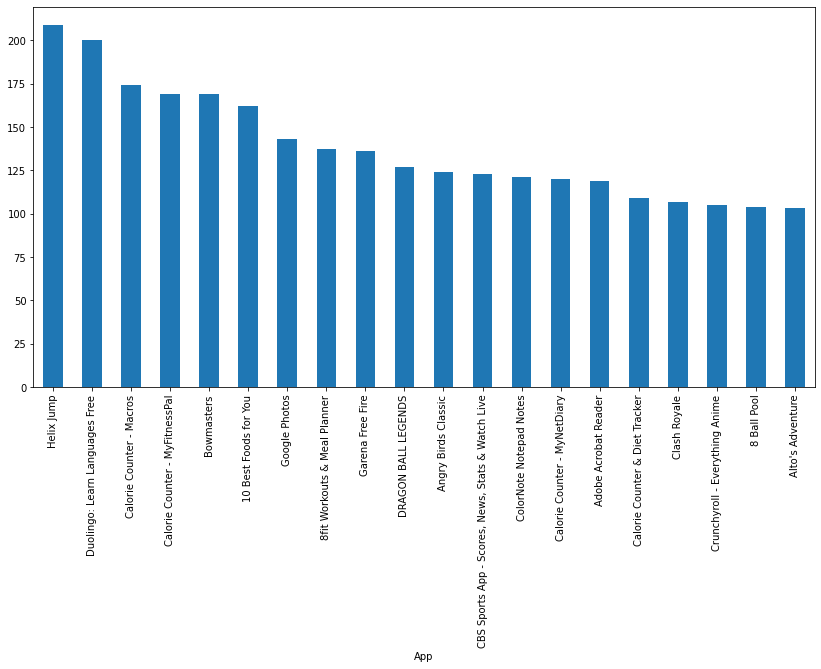

In [86]:
most_positive_apps.plot(kind='bar', figsize= (14,7))

### Top 3 apps with the most no. of positive user sentiments

* Helix Jump 
* Duolingo: Learn Languages Free
* Calorie Counter - Macros


## Which apps that have the most negative reviews?

In [87]:
# taking a dataframe where all the sentiment of users are negative
neg_df= reviews_df[reviews_df['Sentiment'] == 'Negative']

# grouping by app name
neg = neg_df.groupby('App')

In [88]:
neg.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.50000,0.50000
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.20000,0.00000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.20000,0.00000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.80000,0.80000
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.32500,0.47500
...,...,...,...,...,...
64196,Housing-Real Estate & Property,Incorrect listings. The agents show property d...,Negative,-0.02500,0.12500
64197,Housing-Real Estate & Property,Pathetic app.All posted leads owner either old...,Negative,-0.36250,0.62500
64199,Housing-Real Estate & Property,Filters useless I posted owners shows agents a...,Negative,-0.50000,0.20000
64201,Housing-Real Estate & Property,Filters work... Searching property useless,Negative,-0.50000,0.20000


In [89]:
# sorting by the no. of negative sentiment reviewed apps (highest to lowest) and taking the top 20
most_negative_apps = neg['Sentiment'].count().sort_values(ascending= False).iloc[:20]
most_negative_apps

App
Angry Birds Classic                                  147
Candy Crush Saga                                     126
Bowmasters                                           119
8 Ball Pool                                          106
Candy Crush Soda Saga                                 96
Garena Free Fire                                      81
Cooking Fever                                         79
Alto's Adventure                                      72
Block Puzzle                                          71
Agar.io                                               66
Gardenscapes                                          63
Facebook                                              60
Be A Legend: Soccer                                   59
Helix Jump                                            58
Clash Royale                                          58
Expedia Hotels, Flights & Car Rental Travel Deals     55
Calorie Counter - MyFitnessPal                        52
Flow Free                  

In [90]:
most_negative_apps_df = most_negative_apps.to_frame().reset_index()

In [91]:
most_negative_apps_df

,App,Sentiment
0,Angry Birds Classic,147
1,Candy Crush Saga,126
2,Bowmasters,119
3,8 Ball Pool,106
4,Candy Crush Soda Saga,96
5,Garena Free Fire,81
6,Cooking Fever,79
7,Alto's Adventure,72
8,Block Puzzle,71
9,Agar.io,66


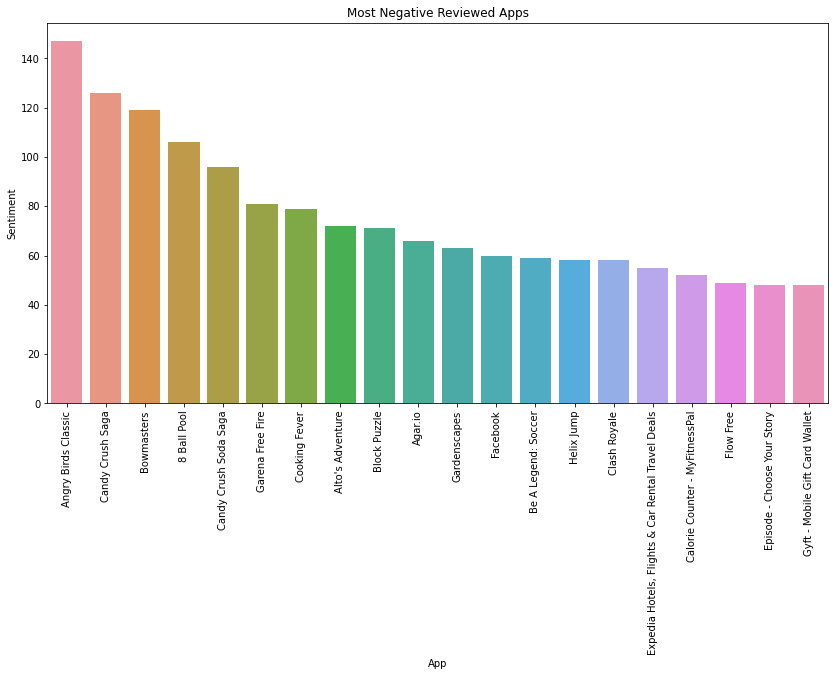

In [92]:
# Plotting the graph
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Sentiment")
plt.ylabel("App")
plt.title("Most Negative Reviewed Apps")
sns.barplot(most_negative_apps_df.App, most_negative_apps_df.Sentiment)
plt.show()

### The apps that received the most negative reviews were ---

1.   Angry Birds Classic
2.   Candy Crush Saga
3.   Bowmasters


Text(0.5, 1.0, 'Percentage Dist of User Sentiment types')

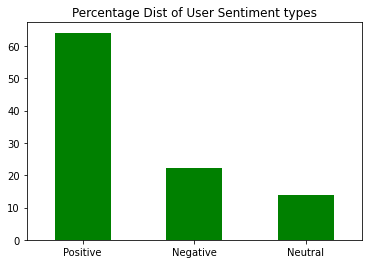

In [93]:
# percentage distribution by Sentiment types
round(reviews_df['Sentiment'].value_counts(normalize = True)*100, 2).plot(kind = 'bar', color = 'g')
plt.xticks(rotation=0)
plt.title('Percentage Dist of User Sentiment types')

## Now, we are going to be building a Sentiment Analysis model on top of this dataset.. Let's see

In [94]:
# Checking for unique values in the sentiment column
print(reviews_df['Sentiment'].unique())

['Positive' 'Neutral' 'Negative']


In [95]:
reviews_df['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

In [96]:
print('percentage of different User Sentimnets in the data --')
print(round(reviews_df['Sentiment'].value_counts(normalize = True)*100, 2))

percentage of different User Sentimnets in the data --
Positive    64.12
Negative    22.10
Neutral     13.78
Name: Sentiment, dtype: float64


Text(0.5, 1.0, 'Percentage Dist of User Sentiment types')

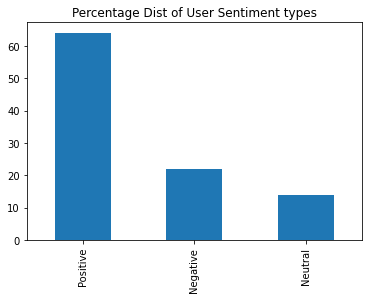

In [97]:
# percentage distribution by Sentiment types
round(reviews_df['Sentiment'].value_counts(normalize = True)*100, 2).plot(kind = 'bar')
plt.title('Percentage Dist of User Sentiment types')

In [98]:
reviews_df.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000
64230,Housing-Real Estate & Property,"Useless app, I searched flats kondapur, Hydera...",Negative,-0.316667,0.400000


In [99]:
# Selecting only the columns that we are going to work with
sent_data = reviews_df.loc[:, ['Translated_Review', 'Sentiment']]
sent_data.tail()

,Translated_Review,Sentiment
64222,Most ads older many agents ..not much owner po...,Positive
64223,"If photos posted portal load, fit purpose. I'm...",Positive
64226,"Dumb app, I wanted post property rent give opt...",Negative
64227,I property business got link SMS happy perform...,Positive
64230,"Useless app, I searched flats kondapur, Hydera...",Negative


## Now, we need to clean our review text so that we can use it as our model input

### *Preprocessing and text-cleaning*

In [100]:
# before cleaning the text
reviews_df.Translated_Review[0]

'I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"'

In [101]:
# changing the texts to lower case
sent_data['lower'] = sent_data['Translated_Review'].apply(lambda x : ' '.join(word.lower() for word in x.split()))


# checking the changes
sent_data.head()

,Translated_Review,Sentiment,lower
0,I like eat delicious food. That's I'm cooking ...,Positive,i like eat delicious food. that's i'm cooking ...
1,This help eating healthy exercise regular basis,Positive,this help eating healthy exercise regular basis
3,Works great especially going grocery store,Positive,works great especially going grocery store
4,Best idea us,Positive,best idea us
5,Best way,Positive,best way


In [102]:
# removing punctuations
sent_data['no_punc'] = sent_data['lower'].str.replace('[^\w\s]', '')

# checking the changes
sent_data.head()

,Translated_Review,Sentiment,lower,no_punc
0,I like eat delicious food. That's I'm cooking ...,Positive,i like eat delicious food. that's i'm cooking ...,i like eat delicious food thats im cooking foo...
1,This help eating healthy exercise regular basis,Positive,this help eating healthy exercise regular basis,this help eating healthy exercise regular basis
3,Works great especially going grocery store,Positive,works great especially going grocery store,works great especially going grocery store
4,Best idea us,Positive,best idea us,best idea us
5,Best way,Positive,best way,best way


### *Importing natural language tool kit*

In [103]:
import nltk
nltk.download('stopwords')


# importing stopwords
from nltk.corpus import stopwords

# getting the english language stopwords
stop_words = stopwords.words('english')

# stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [104]:
# getting rid of the stop words
sent_data['no_stopwords'] = sent_data['no_punc'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [105]:
# checking the changes
sent_data.head()

,Translated_Review,Sentiment,lower,no_punc,no_stopwords
0,I like eat delicious food. That's I'm cooking ...,Positive,i like eat delicious food. that's i'm cooking ...,i like eat delicious food thats im cooking foo...,like eat delicious food thats im cooking food ...
1,This help eating healthy exercise regular basis,Positive,this help eating healthy exercise regular basis,this help eating healthy exercise regular basis,help eating healthy exercise regular basis
3,Works great especially going grocery store,Positive,works great especially going grocery store,works great especially going grocery store,works great especially going grocery store
4,Best idea us,Positive,best idea us,best idea us,best idea us
5,Best way,Positive,best way,best way,best way


In [106]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer


wordnet = WordNetLemmatizer()
porter = PorterStemmer()

In [107]:
# nltk.download('porter')

In [108]:
# Stemming the texts

# sent_data['clean'] = sent_data['no_stopwords'].apply(lambda x: ' '.join(porter.stem(word) for word in x.split() ))

### *After doing some checking, we see that stemming is not serving our best interest, so we decided not to use it*

In [ ]:
import nltk
nltk.download('all')

In [110]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [111]:
sent_data['clean'] = sent_data['no_stopwords'].apply(lambda x: ' '.join(wordnet.lemmatize(word) for word in x.split() ))

In [112]:
# checking the changes
sent_data.head()

,Translated_Review,Sentiment,lower,no_punc,no_stopwords,clean
0,I like eat delicious food. That's I'm cooking ...,Positive,i like eat delicious food. that's i'm cooking ...,i like eat delicious food thats im cooking foo...,like eat delicious food thats im cooking food ...,like eat delicious food thats im cooking food ...
1,This help eating healthy exercise regular basis,Positive,this help eating healthy exercise regular basis,this help eating healthy exercise regular basis,help eating healthy exercise regular basis,help eating healthy exercise regular basis
3,Works great especially going grocery store,Positive,works great especially going grocery store,works great especially going grocery store,works great especially going grocery store,work great especially going grocery store
4,Best idea us,Positive,best idea us,best idea us,best idea us,best idea u
5,Best way,Positive,best way,best way,best way,best way


## *Time to train the model ---*

In [113]:
# importing train-test split
from sklearn.model_selection import train_test_split


i_var = sent_data['clean']
d_var = sent_data['Sentiment']


# doing the split
i_var_train, i_var_test, d_var_train, d_var_test = train_test_split(i_var, d_var, test_size = 0.25, random_state = 43)


print('i_var_train', len(i_var_train))
print('i_var_test', len(i_var_test))
print('d_var_train', len(d_var_train))
print('d_var_test', len(d_var_test))

i_var_train 28070
i_var_test 9357
d_var_train 28070
d_var_test 9357


In [114]:
# importing Vectorizer & Linear regression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

tvec = TfidfVectorizer()
clf1 = LogisticRegression(solver = "lbfgs")
clf2 = SVC()


# importing pipeline
from sklearn.pipeline import Pipeline

In [115]:
# models
model1 = Pipeline([('vectorizer',tvec),('classifier',clf1)]) #logistic Regression model
model2 = Pipeline([('vectorizer',tvec),('classifier',clf2)]) #SVC model

# model fitting time
model1.fit(i_var_train, d_var_train)  # fiiting logistic model
model2.fit(i_var_train, d_var_train) #fitting SVC


from sklearn.metrics import confusion_matrix


# making predictions
predictions_model1 = model1.predict(i_var_test)
predictions_model2 = model2.predict(i_var_test)

In [116]:
# confusion matrix for models
print('model1 confusion matrix : ',confusion_matrix(predictions_model1, d_var_test))
print('\n')

print('model2 confusion matrix : ',confusion_matrix(predictions_model2, d_var_test))

model1 confusion matrix :  [[1604   37  120]
 [  78 1007   92]
 [ 351  221 5847]]


model2 confusion matrix :  [[1622   29   88]
 [  70 1005   78]
 [ 341  231 5893]]


The confusion metric doesn't look bad. It can definitely be better.  

Let's check the other model metrics.

In [117]:
# checking the model scores and performance
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy for model1 is : ", accuracy_score(predictions_model1, d_var_test))
print("Precision for model1 is : ", precision_score(predictions_model1, d_var_test, average = 'weighted'))
print("Recall for model1 is : ", recall_score(predictions_model1, d_var_test, average = 'weighted'))

Accuracy for model1 is :  0.9039221972854548
Precision for model1 is :  0.9106282610270511
Recall for model1 is :  0.9039221972854548


In [118]:
# checking the model scores and performance
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy for model2 is : ", accuracy_score(predictions_model2, d_var_test))
print("Precision for model2 is : ", precision_score(predictions_model2, d_var_test, average = 'weighted'))
print("Recall for model2 is : ", recall_score(predictions_model2, d_var_test, average = 'weighted'))

Accuracy for model2 is :  0.9105482526450785
Precision for model2 is :  0.9181717191629339
Recall for model2 is :  0.9105482526450785


### *90% accuracy on Logistic model and 91% accuracy on SVC model looks good enough for this very basic model...*

### *We should try to check with some actual values too ---*

*for Logistic Model ----*

In [119]:
# actual test data sentiment value
print(f'actual test data values - ',list(d_var_test[5:20]))
print('\n')

# predictions values
print(f'predictions values are - ',list(predictions_model1[5:20]))

actual test data values -  ['Positive', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Neutral', 'Positive', 'Positive', 'Positive']


predictions values are -  ['Positive', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Neutral', 'Positive', 'Positive', 'Neutral']


*for SVC model ----*

In [120]:
# actual test data sentiment value
print(f'actual test data values - ',list(d_var_test[5:20]))
print('\n')

# predictions values
print(f'predictions values are - ',list(predictions_model2[5:20]))

actual test data values -  ['Positive', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Neutral', 'Positive', 'Positive', 'Positive']


predictions values are -  ['Positive', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Neutral', 'Positive', 'Positive', 'Positive']


# ***Conclusion --***

### *Our project has come to an end. It's time to reflect on if we accomplished what we set out to do, that is understanding the data, drawing insights from it in order to figure out app engagements, influencing factors and what's trending among the users.*
                                                                                                                                                                 

### *We visualized the trends & correlations and also made an analysis model that will help us to understand users' sentiments regarding different applications, and will also be applicable for future observations...*

### *Exploratory Data Analysis tells us exactly how users responded to different apps, their experiences with the apps, and the popularity of applications among users.*

###  *EDA process provides all these insights that can help new-coming developers to understand the market and work on apps that will provide value to the user. EDA captures the essence of the enormous potential that the android market has when it comes to developers succeeding in this market.*

###  *Analysing the actual ratings or popularity and comparing them with predicted results can tell us if the apps are performing as expected, better or worse compared to other apps.*

###  *Also, the dataset gives a clear indication of which apps are in demand, so that developers can popularize the app store with similar products.*

###  *The Sentiment Analysis model helps us to figure out users experiences for the applications that they used.*

###  *These datasets have the potential of delivering with insights to better understand and process customer demands and their sentiments regarding the android apps, which can help in making better decisions in future for developers.*